<a href="https://colab.research.google.com/github/KontainPluton/TPs_Artificial_Neural_Network/blob/main/%5BTP_1%5D_ANN_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch introduction


**Objective** The goal of this practical session is to implement the simple fully functional artificial neural network (ANN) you've implemented in the previous session, but in a much more simple way using PyTorch. 

At this stage we will assume that you've fully understand what has been done in the first session, and that you've in particular understood the takeaway message proposed at the end of the session (we will quickly repeat some notions, but do not hesistate to read it again carefully if it's not the case). 

As we will see, the PyTorch framework will implicitly take care of numerous tricky details, in particular those related to gradient computation and backpropagation.   

**Prerequisites**: introductory level in machine learning, basics of calculus and linear algebra, a first quick introduction to ANNs, basic Python skills, previous pratical sessions, and well, as usual, motivation!

**Estimated time**: 8 hours (generous)

****


<img  width="200" src="https://drive.google.com/uc?id=1_d9U9O9kUOvQTvm4vdpEUyn0deB2nBXI"/>

*PyTorch is an open source machine learning library based on the Torch library, used for applications such as computer vision and natural language processing primarily developed by Facebook's AI Research lab (FAIR). It is free and open-source software released under the Modified BSD license. Although the Python interface is more polished and the primary focus of development, PyTorch also has a C++ interface.*

*A number of pieces of Deep Learning software are built on top of PyTorch, including Tesla Autopilot, Uber's Pyro, HuggingFace's Transformers, PyTorch Lightning, and Catalyst.*

*PyTorch provides two high-level features:*

* *Tensor computing (like NumPy) with strong acceleration via graphics processing units (GPU)*
* *Deep neural networks built on a tape-based automatic differentiation system*

source: https://en.wikipedia.org/wiki/PyTorch

Official website: https://pytorch.org/ 

This tutorial is based on https://pytorch.org/tutorials/beginner/pytorch_with_examples.html. Several modifications have been made, and extra content added to match, as much as possible, with the content given in this course and your background. 

We will first briefly discuss important notions of the framework in order to introduce some concepts and to implement our neural network. Specific sessions will be next proposed in which you'll have the change to deeply analyse some of those notions. 



## PyTorch: Tensors

**PyTorch is heavily based on the notion of *Tensor*. 
You can consider that these Tensors are conceptually identical to numpy array (matrix)** for now, there are *just* n-dimensional arrays and, similarly to the  many operations as Numpy provides to operate on Numpy arrays, PyTorch provides numerous operations to operate on Tensors. Obviously PyTorch is not reinventing the wheel here, Tensor are supercharged n-dimensional arrays in the context of neural network development, just be patient.   

You recall our first raw ANN implementation using Numpy. 
Let's do the same using PyTorch.

We will still use the same labelling function (implemented using Numpy). 



In [ ]:
# -*- coding: utf-8 -*-
import numpy as np
import torch

theta = 45

# our labeling function
def x_axis_theta_rotation(p):
  """ return new (x,y,z) coordinates of the point after a theta-based rotation along the x-axis
      Note: understanding this function is not important. 
      We could also add a random noise
  """

  return np.array([
    p[0],
    p[1]*np.cos(p[0] * theta) - p[2]*np.sin(p[0] * theta),
    p[1]*np.sin(p[0] * theta) + p[2]*np.cos(p[0] * theta)
  ])

def get_dataset(N, D_in, D_out):

  """Create N random input and associated label"""
  x = np.random.randn(N, D_in)
  y = np.array([x_axis_theta_rotation(xi) for xi in x]) 

  return (x,y)

N = 1000 # size of the dataset
D_in, D_out = 3, 3 # input and output dimensions, we name them to distinguish them hereafter

x, y = get_dataset(N, D_in, D_out)
x, y = torch.from_numpy(x).float(), torch.from_numpy(y).float()

print("Data (first 10 elements)")
print("Inputs\n", x[:10,:])
print("Labels\n", y[:10,:])

print("\nExample")
print("input 1: ", x[0])
print("label 1: ", y[0])


Data (first 10 elements)
Inputs
 tensor([[ 0.6814, -0.4042,  0.2958],
        [ 0.3772, -0.1664, -0.1145],
        [ 0.5588, -0.1401, -1.9276],
        [-0.2006, -0.7230, -0.6830],
        [-1.1777,  1.8797,  0.9316],
        [ 0.2266, -1.0920, -0.7031],
        [ 0.1084,  0.7845,  0.2417],
        [-0.2677, -0.0423,  0.2796],
        [ 1.1464,  1.1791, -0.0476],
        [-0.4697, -1.8787, -0.8839]])
Labels
 tensor([[ 0.6814, -0.0934,  0.4920],
        [ 0.3772, -0.0590,  0.1932],
        [ 0.5588, -0.1135, -1.9294],
        [-0.2006,  0.4025,  0.9095],
        [-1.1777, -1.3521, -1.6041],
        [ 0.2266,  0.2940,  1.2650],
        [ 0.1084,  0.3665, -0.7345],
        [-0.2677, -0.1758,  0.2215],
        [ 1.1464,  0.3365,  1.1311],
        [-0.4697,  0.5622,  1.9987]])

Example
input 1:  tensor([ 0.6814, -0.4042,  0.2958])
label 1:  tensor([ 0.6814, -0.0934,  0.4920])


As you can see, there is a bridge between Numpy and PyTorch. 
The output is pretty similar to what we got except that we are now dealing with Tensors. Note that the same syntactic sugar syntax can be used to manipulate our tensors (e.g. `x[:1,:]`). 

In [ ]:
# -*- coding: utf-8 -*-

import torch

H = 64 # number of neurons in the hidden layer

dtype = torch.float

# Randomly initialize weights
w1 = torch.randn(D_in, H, dtype=dtype)
w2 = torch.randn(H, D_out, dtype=dtype)

learning_rate = 1e-6

for t in range(30001):
    # Forward pass: compute predicted y
    h = x.mm(w1) # x @ w1 (like np.dot)
    h_relu = h.clamp(min=0)
    y_pred = h_relu.mm(w2)

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    if t % 1000 == 0:
        print(t, loss)

    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h = grad_y_pred.mm(w2.t())
    grad_h[h < 0] = 0
    grad_w1 = x.t().mm(grad_h)

    # Update weights using gradient descent
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 155201.40625
1000 2581.572021484375
2000 2258.8515625
3000 2122.04833984375
4000 2040.269775390625
5000 1991.5140380859375
6000 1957.214111328125
7000 1932.2303466796875
8000 1914.2841796875
9000 1901.155029296875
10000 1889.0750732421875
11000 1878.1668701171875
12000 1870.048583984375
13000 1862.3287353515625
14000 1855.537841796875
15000 1849.213134765625
16000 1842.78955078125
17000 1836.79150390625
18000 1831.572265625
19000 1826.4666748046875
20000 1821.822509765625
21000 1817.405517578125
22000 1813.10546875
23000 1808.8836669921875
24000 1805.5235595703125
25000 1803.0594482421875
26000 1800.482666015625
27000 1797.9573974609375
28000 1795.822265625
29000 1793.76953125
30000 1791.8878173828125


Do not compare the results you obtain running the first notebook since the datasets are not the same.

As you can see, the implementation is quite similar. 
We just had to use the proper functions to implement the operations we wanted to perform on our Tensors in both the forward and backward passes. We will not discuss them in detail now but it's quite intuitive `mm(...)` stands for matrix multiplication, `t()` for transpose...

*****

Let's now introduce a first very interesting feature of tensors. 
We will change the device on which will be performed our computations. 

We will used Graphic cards, GPUs ([Graphical Processing Units](https://en.wikipedia.org/wiki/Graphics_processing_unit)). These devices are very effective to operate on n-dimensional arrays, e.g. to perform linear algebra operations which are often used in our ANNs. 

<img  width="300" src="https://drive.google.com/uc?id=1cxGXDY06sH9GRS1o8xOksTwOEPzicRvU"/>

Above a picture of several Nvidia v100 32G GPUs.

First you have to specify you want to use a GPU using Colab. 
To do so, in the menu, select `Runtime/Change Runtime type` then select `GPU`. 
You'll need to reload some of the code you already executed since your notebook is now most surely running on a different computer. *As specified by the Colab interface, GPUs are sparse resources, only use them if you require them (limitations are applied)*.

Tiny modifications will be made in our code to enable training on GPUs.
Thoses modifications aim at making sure that the datastructures we are using during the forward and backward passes are located on the proper device. It would obviously make no sense to perform a matrix multiplication of two matrices located to different devices. 


We will therefore: 
* load the training data on the corresponding device. Tensors can simply be loaded to a device using `.to()`  
* Make sure that the tensors related to our ANN's parameters are on GPU. To do so we can specify the device on which the tensor data have to be stored creating a tensor,e.g. to create a random tensor on a given device `dev` we will simply use `w1 = torch.randn(..., device=dev)`. 





In [ ]:
import datetime

def run_training(x, y, epochs, device): 

  print("starting training on ", device)
  start_time = datetime.datetime.now()

  # Put our training data on the good device
  x = x.to(device)
  y = y.to(device)

  H = 500 # number of neurons in the hidden layer
  dtype = torch.float
  # Randomly initialize weights
  w1 = torch.randn(D_in, H, device=device, dtype=dtype)
  w2 = torch.randn(H, D_out, device=device, dtype=dtype)

  learning_rate = 1e-6
  for t in range(epochs):
      # Forward pass: compute predicted y
      h = x.mm(w1) # x @ w1 also supported
      h_relu = h.clamp(min=0)
      y_pred = h_relu.mm(w2)

      # Compute and print loss
      loss = (y_pred - y).pow(2).sum().item()
      if t % 5000 == 0:
          print("{}\t{:.3f}".format(t, loss))

      # Backprop to compute gradients of w1 and w2 with respect to loss
      grad_y_pred = 2.0 * (y_pred - y)
      grad_w2 = h_relu.t().mm(grad_y_pred)
      grad_h = grad_y_pred.mm(w2.t())
      grad_h[h < 0] = 0
      grad_w1 = x.t().mm(grad_h)

      # Update weights using gradient descent
      w1 -= learning_rate * grad_w1
      w2 -= learning_rate * grad_w2

  run_time = datetime.datetime.now() - start_time
  print(device, "training time ~", run_time.seconds, "sec\n")
  return run_time.seconds

epochs = 5000

device = torch.device("cpu")
run_time_sec_cpu = run_training(x, y, epochs, device)

device = torch.device("cuda:0") # Uncomment this to run on GPU
run_time_sec_gpu = run_training(x, y, epochs, device)

print("Speeding factor using GPU  x {}{:.2f}".format("+" if run_time_sec_cpu > run_time_sec_gpu else "-", run_time_sec_cpu / run_time_sec_gpu))

starting training on  cpu
0	2973040.000
cpu training time ~ 24 sec

starting training on  cuda:0
0	2242825.000
cuda:0 training time ~ 1 sec

Speeding factor using GPU  x +24.00


Note that the model we are implementing is very tiny. You can augment the number of parameters increasing $H$. Do not exagerate tho, give it a try with $H=500$: keep in mind that this modification impacts the shapes of $W_{1}$ and $W_{2}$ that will be loaded on GPUs (a 32G GPU is today a big GPU).

Speeding factor up to 50 can be obtained (yes, in one day you can train a model that would require 50 days training on CPU).

This is already a very interesting feature of PyTorch Tensors!

But there is more. 

*Please free the GPUs changing the runtime type to GPU*


In [ ]:
device = torch.device("cpu")

## PyTorch: autograd

Using PyTorch, it is possible to specify that we want the history of operations applied to a Tensor to be recorded. Recording these operations will enable the framework to automatically perform differentiation to compute the gradients we will need to perform backpropagation (`autograd`). 

We will use this powerful mechanism to automatically compute the gradient of the loss function with regard to the parameters. Only the Tensors related to the parameters will thus be concerned.  

Telling PyTorch that we will need to compute the gradient of something (the loss) with regards to a Tensor is very easy. Creating the Tensor you just need to specify `requires_grad=True` (default is false). 

Creating a random Tensor for which the information required to compute the gradient will be stored is thus: `w1 = torch.randn(..., requires_grad=True)`

In [ ]:
# Create random Tensors for weights.
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
w1 = torch.randn(D_in, H, device=device, dtype=dtype, requires_grad=True)
w2 = torch.randn(H, D_out, device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(500):
    # Forward pass: compute predicted y using operations on Tensors; these
    # are exactly the same operations we used to compute the forward pass using
    # Tensors, but we do not need to keep references to intermediate values since
    # we are not implementing the backward pass by hand.
    y_pred = x.mm(w1).clamp(min=0).mm(w2)

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call w1.grad and w2.grad will be Tensors holding the gradient
    # of the loss with respect to w1 and w2 respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad

        # Manually zero the gradients after updating weights
        w1.grad.zero_()
        w2.grad.zero_()

99 5178.23046875
199 3778.9248046875
299 3423.142333984375
399 3236.691650390625
499 3101.42822265625


You should be very pleased at this stage. 
No need to compute the gradient of the loss with regards to the parameters of the network anymore (and that was painful). This can now be automatically managed by the framework.

In [ ]:
# Create random Tensors for weights.
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
w1 = torch.randn(D_in, H, device=device, dtype=dtype, requires_grad=True)
w2 = torch.randn(H, D_out, device=device, dtype=dtype, requires_grad=True)

print("Gradient w1: ", w1.grad)
print("Gradient w2: ", w2.grad)

learning_rate = 1e-6

y_pred = x.mm(w1).clamp(min=0).mm(w2)
loss = (y_pred - y).pow(2).sum()
print("loss: ", loss)

loss.backward()

print("Gradient w1 (shape): ", w1.grad.shape)
print("Gradient w2 (shape): ", w2.grad.shape)




Gradient w1:  None
Gradient w2:  None
loss:  tensor(114628.4062, grad_fn=<SumBackward0>)
Gradient w1 (shape):  torch.Size([3, 64])
Gradient w2 (shape):  torch.Size([64, 3])


From the [official documentation](https://pytorch.org/docs/stable/notes/autograd.html), you can read: 

*Autograd is reverse automatic differentiation system. Conceptually, autograd records a graph recording all of the operations that created the data as you execute operations, giving you a directed acyclic graph whose leaves are the input tensors and roots are the output tensors. By tracing this graph from roots to leaves, you can automatically compute the gradients using the chain rule.*

## PyTorch: nn

We will keep simplifying the way we define our ANNs. Indeed, when building neural networks we frequently think of arranging the computation into layers, some of which have learnable parameters which will be optimized during learning.
PyTorch provides the `nn` package which makes the definition of ANN easy.

In PyTorch, the `nn` package provide higher-level abstractions over raw computational graphs that are useful for building neural networks (Keras for instance provides the same functionalities using TensorFlow). 

Indeed, the `nn` package defines a set of Modules, which are roughly equivalent to neural network layers. A Module receives input Tensors and computes output Tensors, but may also hold internal state such as Tensors containing learnable parameters. The `nn` package also defines a set of useful loss functions that are commonly used when training neural networks.

In this example we use the nn package to implement our simple ANN:

In [ ]:

# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. Each Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

def train(model, epochs, log_frequency):

  print("Training")

  # The nn package also contains definitions of popular loss functions; in this
  # case we will use Mean Squared Error (MSE) as our loss function.
  # Remember that we are dealing with a regression task.
  loss_fn = torch.nn.MSELoss(reduction='sum')

  learning_rate = 1e-4
  for t in range(epochs+1):
      # Forward pass: compute predicted y by passing x to the model. Module objects
      # override the __call__ operator so you can call them like functions. When
      # doing so you pass a Tensor of input data to the Module and it produces
      # a Tensor of output data.
      y_pred = model(x) # same as model.forward(x) (Pass forward)

      # Compute and print loss. We pass Tensors containing the predicted and true
      # values of y, and the loss function returns a Tensor containing the
      # loss.
      loss = loss_fn(y_pred, y)
      if t % log_frequency == 0:
          print(t, loss.item())

      # Zero the gradients before running the backward pass.
      model.zero_grad()

      # Backward pass: compute gradient of the loss with respect to all the learnable
      # parameters of the model. Internally, the parameters of each Module are stored
      # in Tensors with requires_grad=True, so this call will compute gradients for
      # all learnable parameters in the model.
      loss.backward()

      # Update the weights using gradient descent. Each parameter is a Tensor, so
      # we can access its gradients like we did before.
      with torch.no_grad():
          for param in model.parameters():
              param -= learning_rate * param.grad


train(model, 30000, 5000)

Training
0 2990.069580078125
5000 1783.3824462890625
10000 1735.5933837890625
15000 1753.14306640625
20000 1729.34521484375
25000 1811.726318359375
30000 1744.028076171875


We will later use numerous module and loss implementations exposed by the `nn` package. It will help us to define more complex ANNs.

See how it is easy now to add several layers to our model. 

In [ ]:
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

train(model, 30000, 5000)


Training
0 3058.288330078125
5000 926.2432250976562
10000 506.29962158203125
15000 339.3179626464844
20000 231.51913452148438
25000 221.85214233398438
30000 91.50235748291016


You can also use fancy python constructs to create your network

In [ ]:
def buildFFN(nb_hidden_layers): # FFN: Feedforward network

  assert nb_hidden_layers >= 2, "nb_hidden_layers must be >= 2"
  
  # defining the first hidden layer
  layers = [
            torch.nn.Linear(D_in, H),
            torch.nn.ReLU()
            ]

  # adding any extra hidden layers
  for i in range(nb_hidden_layers -2):
    layers += [
              torch.nn.Linear(H, H),
              torch.nn.ReLU()
              ]

  # adding the output layer
  layers += [torch.nn.Linear(H, D_out)]

  model = torch.nn.Sequential(*layers) # The single star * unpacks the sequence/collection into positional arguments
  print(model)

  nb_trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad) # model.parameters() gives access to the model parameters.
  print("number of trainable paramerters: ", nb_trainable_params)

  return model

H = 128 # number of neurons in each layer
model = buildFFN(nb_hidden_layers = 10)

train(model, 10000, 1000)

Sequential(
  (0): Linear(in_features=3, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=128, bias=True)
  (5): ReLU()
  (6): Linear(in_features=128, out_features=128, bias=True)
  (7): ReLU()
  (8): Linear(in_features=128, out_features=128, bias=True)
  (9): ReLU()
  (10): Linear(in_features=128, out_features=128, bias=True)
  (11): ReLU()
  (12): Linear(in_features=128, out_features=128, bias=True)
  (13): ReLU()
  (14): Linear(in_features=128, out_features=128, bias=True)
  (15): ReLU()
  (16): Linear(in_features=128, out_features=128, bias=True)
  (17): ReLU()
  (18): Linear(in_features=128, out_features=3, bias=True)
)
number of trainable paramerters:  132995
Training
0 3045.44482421875
1000 1990.05322265625
2000 1986.0855712890625
3000 1869.8726806640625
4000 1645.4398193359375
5000 1845.59375
6000 981.119140625
7000 630.8112182617188
8000 591.160888671875
9000 392.519

## PyTorch: optim

Up to this point we have updated the weights of our models by manually mutating the Tensors holding learnable parameters (with `torch.no_grad()` to avoid tracking history in autograd). 

This is not a huge burden for simple optimization algorithms like stochastic gradient descent, but in practice we often train neural networks using more sophisticated optimizers like AdaGrad, RMSProp, Adam, etc.

The `optim` package in PyTorch abstracts the idea of an optimization algorithm and provides implementations of commonly used optimization algorithms.


In [ ]:

def train_optim(model, epochs, log_frequency):

  print("Training (nn.optim)")

  loss_fn = torch.nn.MSELoss(reduction='sum')

  # Use the optim package to define an Optimizer that will update the weights of
  # the model for us. Here we will use Adam; the optim package contains many other
  # optimization algorithms. The first argument to the Adam constructor tells the
  # optimizer which Tensors it should update.
  learning_rate = 1e-4
  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
  model.train()
  
  for t in range(epochs+1):

      y_pred = model(x)
      loss = loss_fn(y_pred, y)

      if t % log_frequency == 0:
          print(t, loss.item())

      # Before the backward pass, use the optimizer object to zero all of the
      # gradients for the variables it will update (which are the learnable
      # weights of the model). This is because by default, gradients are
      # accumulated in buffers( i.e, not overwritten) whenever .backward()
      # is called. Checkout docs of torch.autograd.backward for more details.
      optimizer.zero_grad()

      # Backward pass: compute gradient of the loss with respect to model
      # parameters
      loss.backward()

      # Calling the step function on an Optimizer makes an update to its
      # parameters
      optimizer.step()

H = 64
model = buildFFN(nb_hidden_layers=2)
train_optim(model, 30000, 5000)


Sequential(
  (0): Linear(in_features=3, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=3, bias=True)
)
number of trainable paramerters:  451
Training (nn.optim)
0 3160.486572265625
5000 1808.784912109375
10000 1652.245361328125
15000 1542.7691650390625
20000 1479.944091796875
25000 1445.5252685546875
30000 1425.3642578125


## Save / Load a model

Details about model saving and loading will be discussed later.
This will be used to load a train model to perform inference and to load reload a model and optimizer state to continue training an already trained model.  

You can nevertheless already check the syntax in the official documentation   
https://pytorch.org/tutorials/beginner/saving_loading_models.html

# Exercise

You'll be asked to create your first PyTorch ANN alone.

You'll deal with a famous Handwritten digits dataset: http://yann.lecun.com/exdb/mnist/



In [ ]:
import torch
from torchvision import datasets, transforms

'''
  This code is used to download the dataset which is already splitted
  into a training  set and a testing set.
  Note that we apply simple transformation to the data to convert them
  into PyTorch Tensors and to normalize the pixel values entries in a 
  specific range of values. 
'''

transform_actions = transforms.Compose(
    [
     transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))
    ]
)

mnist_trainset = datasets.MNIST(
    root='./data', 
    train=True, 
    download=True, 
    transform = transform_actions
)
    
mnist_testset = datasets.MNIST(
    root='./data', 
    train=False, 
    download=True, 
    transform = transform_actions
)


print("Training set size: ", len(mnist_trainset))
print("Testing set size : ", len(mnist_testset))

# we define a loader and an iterator to process the training set
trainloader = torch.utils.data.DataLoader(mnist_trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(mnist_testset, batch_size=64, shuffle=True)

mnist_trainset_iter = iter(trainloader)




  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Training set size:  60000
Testing set size :  10000


In [ ]:
elem = next(mnist_trainset_iter)

In [ ]:
batch, target = elem
print(batch.shape)
print(target.shape)
print(batch[30])

torch.Size([64, 1, 28, 28])
torch.Size([64])
tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
   

Let's see what we are dealing with. 

Note that normally you'll have to read the documentation but here we will explore the data and associated labels. 

Images shape:  torch.Size([64, 1, 28, 28])
Each batch contains 64 images, for which 1 channel of size 28 x 28 is defined 


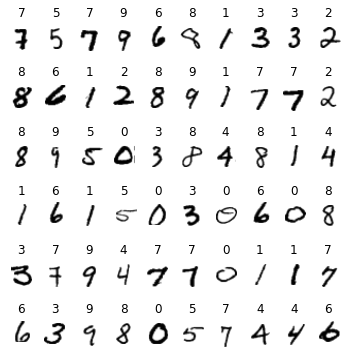

In [ ]:
import matplotlib.pyplot as plt

images, labels = mnist_trainset_iter.next()

print("Images shape: ", images.shape)
print("Each batch contains {} images, for which {} channel of size {} x {} is defined ".format(*images.shape))

# The following code is just used to plot
figure = plt.figure()
plt.subplots_adjust(top=5.2, bottom=4) 
num_of_images = 60
for index in range(0, num_of_images):
    plt.subplot(6, 10, index+1)
    plt.axis('off')
    plt.gca().set_title(labels[index].item())
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

Thus, as you can see, we are dealing with inputs that are represented as 28 x 28 matrices. Note that in this case only one channel is provided for each image (black/white image). Dealing with color image you'd have three channel (RBG).

Since we are dealing with an image dataset, the batch structure is therefore:

`number_of_batch_elements x number_of_channels x image_height_pixels x image_width_pixels` 

Since we are dealing with a single channel, it could have been `number_of_batch_elements x image_height_pixels x image_width_pixels`

As you can see, each image represent an single handwritten digit. The aim is to develop a predictor that will be able to predict to which written digit is associated each image (a numerical value among $[0, 1, ..., 9] $).

We therefore are dealing with a classification task, and in particular a multiclass single label classification task, i.e. each entry is associated to a single class (label) from a set of classes. 

You're asked to develop and train an ANN to tackle this task. 
Do not look at solutions on the web, you'll find plenty of models implemented with PyTorch that are based on more advanced concepts. It will not be very useful for you and you're able to this by yourself, trust us. 

Good luck. 

A few tips are provided below with additional information following on some technical parts: 

* For a given input, the output of your network will be a probability distribution that will express the probability that the input is associated to each of the potential classes considered in your multiclass setting. To do so you'll use the softmax function that is implemented in PyTorch (see below) https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html

* You'll have to consider a new loss since you're now dealing with a classification setting. This loss will be used to favour the output probability distrutions that are closer to the expected one (the one with the full mass associated to the correct label). Select the Cross Entropy Loss (see below for more information) https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html

* Try a simple network first. Try representing your images as vectors of values (stored into a Tensor), as we did for our first ANN. To do so, you'll have to `flatten` the input, i.e. convert a Tensor into a n-dimensional Tensor (a verctor). You can do this directly in your network, no need to preprocess your data. Have a look to `torch.nn.flatten` https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html. This layer will be use to convert a $[-0.5, 0.5]^{1 \times 28 \times 28}$ tensor into a $[-0.5, 0.5]^{784}$ tensor ($28 \times 28 = 784$)    

* Contrary to what we did so far, you'll not be able to process the full training dataset at each optimizer step (remember, this is the step in which you finalize the backpropagation updating the trainable parameters using the computed gradients). Consider the following terminology:
  * a batch, a set of inputs for which you'll perform the forward pass.
  * an epoch: the number of batch iterations required to process the whole training dataset.
  * You can process several batches before performing the backpropagation, i.e. perform `loss.backward()` and then update the gradients (this is called gradient accumulation), but that not important for you now. Consider that you perform a step for each batch you process. 

* Rember that what we want is to be good on the test set. 

Some additional information is provided below. 

**Softmax function** 

The softmax function can be used to transform a vector of real-values $ \mathbf{z} \in \mathbb{R}^{|\mathcal{C}|}$ into a vector $\mathbf{z'} \in [0,1]^{|\mathcal{C}|}$ such as $\sum_i^{|\mathcal{C}|} \mathbf{z'}_i = 1$. 
It is often used as the last activation function of a neural network to normalize the output of a network and to obtain a probability distribution over predicted output classes. 

Considering a muticlass prediction setting with a set of classes $\mathcal{C}$, the network will internaly predict a vector $\mathbf{z} \in \mathbb{R}^{|\mathcal{C}|}$ that will be converted using the softmax into a probability distribution $\mathbf{z'} \in [0,1]^{|\mathcal{C}|}$ with $\sum_i^{|\mathcal{C}|} \mathbf{z'}_i = 1$. 

The final prediction will then be based on a decision rule exploiting $\mathbf{z'}$, e.g in a single label setting the prediction will be defined as $\hat{y} := \text{argmax}_{i \in 1,\ldots,|\mathcal{C}|} \mathbf{z'}_i$

$\text{softmax}(\mathbf{z})_i = \frac{e^{z_i}}{\sum_{j=1}^{|\mathcal{C}|} e^{z_j}} \text{ for } i = 1, \dotsc , |\mathcal{C}| \text{ and } \mathbf z=(z_1,\dotsc,z_{|\mathcal{C}|}) \in \mathbb{R}^{|\mathcal{C}|}$

In practice, the softmax can be seen as a soft [argmax](https://en.wikipedia.org/wiki/Arg_max) (differentiable argmax)

**Cross entropy**

First recall the log loss considered to evaluate a probabilistic binary classifier. 

For a given input observation we expect a prediction $y \in \{0,1\}$ (label is true or false). 
The classifier will compute the probability $p \in [0,1]$ that the input is labelled by the true label: $p = \hat{\mathbb{P}}[y=1]$.

The loss for this entry can be defined by: 

$l(p,y) = −(y log(𝑝)+(1−𝑦)log(1−𝑝))$

In a *similar fashion*, the cross entropy can be used to consider multiclass settings. It can be used to compare two probability distributions $p$ and $q$ over the same underlying set of events [(source)](https://en.wikipedia.org/wiki/Cross_entropy). Considering two discrete probability distributions $p$ and $q$ over a support $\mathcal{X}$ the cross entropy $H(p,q) \in [0,+\infty]$ is defined by:

$H(p,q)=-\sum _{x\in {\mathcal {X}}}p(x)\,\log q(x)$. 

With $\mathbf{y} \in [0,1]^{|\mathcal{C}|}$ the expected distribution and $\hat{\mathbf{y}} \in [0,1]^{|\mathcal{C}|}$ the predicted one.


$H(\mathbf{y},\hat{\mathbf{y}}) = -\sum _{i\in {1,\ldots,|\mathcal{C}|}} \mathbf{y}_i\,\log \hat{\mathbf{y}}_i$.


# Resources 

* [Free Book: Deep Learning with PyTorch](https://pytorch.org/assets/deep-learning/Deep-Learning-with-PyTorch.pdf)

### Model (Classification problem)

In [ ]:
def buildFFN(nb_hidden_layers): # FFN: Feedforward network

  assert nb_hidden_layers >= 2, "nb_hidden_layers must be >= 2"
  
  # defining the first hidden layer
  layers = [
            torch.nn.Flatten(),
            torch.nn.Linear(D_in, H),
            torch.nn.ReLU()
            ]

  # adding any extra hidden layers
  for i in range(nb_hidden_layers -2):
    layers += [
              torch.nn.Linear(H, H),
              torch.nn.ReLU()
              ]

  # adding the output layer
  layers += [
            torch.nn.Linear(H, D_out),
            torch.nn.Softmax(dim=1)
            ]

  model = torch.nn.Sequential(*layers) # The single star * unpacks the sequence/collection into positional arguments
  print(model)

  nb_trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad) # model.parameters() gives access to the model parameters.
  print("number of trainable paramerters: ", nb_trainable_params)

  return model

########################################

D_in = 28 * 28 # (= 784) An image is 28*28 pixels with only one channel 
D_out = 10 # 10 classes {0,1,2,3,4,5,6,7,8,9}

H = 64# Number of neurons
J = 3 # Number of hidden layers

learning_rate = 1e-4 # Learning rate (êta)

model = buildFFN(J)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=64, bias=True)
  (2): ReLU()
  (3): Linear(in_features=64, out_features=64, bias=True)
  (4): ReLU()
  (5): Linear(in_features=64, out_features=10, bias=True)
  (6): Softmax(dim=1)
)
number of trainable paramerters:  55050


### Training

Iter : 0  Correct predictions: 7465  / 10000
Accuracy: 74.650%

Iter : 1  Correct predictions: 8371  / 10000
Accuracy: 83.710%

Iter : 2  Correct predictions: 8975  / 10000
Accuracy: 89.750%

Iter : 3  Correct predictions: 9049  / 10000
Accuracy: 90.490%

Iter : 4  Correct predictions: 9106  / 10000
Accuracy: 91.060%

Iter : 5  Correct predictions: 9150  / 10000
Accuracy: 91.500%

Iter : 6  Correct predictions: 9191  / 10000
Accuracy: 91.910%

Iter : 7  Correct predictions: 9188  / 10000
Accuracy: 91.880%

Iter : 8  Correct predictions: 9224  / 10000
Accuracy: 92.240%

Iter : 9  Correct predictions: 9248  / 10000
Accuracy: 92.480%



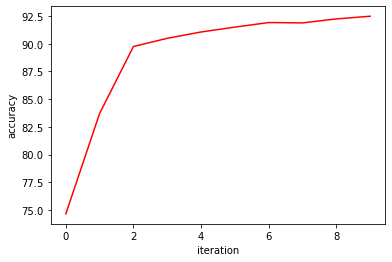

In [ ]:
def train(model, epochs, log_frequency, device):

  AccuracyForEachIteration = []

  model.to(device)

  loss_fn = torch.nn.CrossEntropyLoss(reduction='sum')

  # Use the optim package to define an Optimizer that will update the weights of
  # the model for us. Here we will use Adam; the optim package contains many other
  # optimization algorithms. The first argument to the Adam constructor tells the
  # optimizer which Tensors it should update.
  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
  
  for t in range(epochs):

    model.train()

    for batch_id, [batch_x,batch_y] in enumerate(trainloader):

      batch_x = batch_x.to(device)
      batch_y = batch_y.to(device)

      y_pred = model(batch_x)
      loss = loss_fn(y_pred, batch_y)

      # Uncomment if you want to print loss
      #if t % log_frequency == 0 and batch_id % log_frequency == 0:
        #print(t, batch_id, loss.item())

      # Before the backward pass, use the optimizer object to zero all of the
      # gradients for the variables it will update (which are the learnable
      # weights of the model). This is because by default, gradients are
      # accumulated in buffers( i.e, not overwritten) whenever .backward()
      # is called. Checkout docs of torch.autograd.backward for more details.
      optimizer.zero_grad()

      # Backward pass: compute gradient of the loss with respect to model
      # parameters
      loss.backward()

      # Calling the step function on an Optimizer makes an update to its
      # parameters
      optimizer.step()

    model.eval()

    correctPredictions = 0
    total = 0

    for batch_test_id, [batch_test_x,batch_test_y] in enumerate(testloader):

      batch_test_x = batch_test_x.to(device)
      batch_test_y = batch_test_y.to(device)

      y_test_pred = model(batch_test_x)

      _, index = torch.max(y_test_pred,1)
      
      total += y_test_pred.size(0)
      correctPredictions += (batch_test_y == index).sum().item()

    AccuracyForEachIteration = np.append(AccuracyForEachIteration,(100 * correctPredictions / total))

    print("Iter :",t," Correct predictions:", correctPredictions," /",total)
    print("Accuracy: {:.3f}%\n".format(100 * correctPredictions / total))

  plt.plot(np.arange(0,epochs),AccuracyForEachIteration,color='red')
  plt.xlabel('iteration')
  plt.ylabel('accuracy')
  plt.show()

########################################

ITERATIONS = 10
DISPLAY_LOSS = 100

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

train(model,ITERATIONS,DISPLAY_LOSS,device)